In [29]:
import os
import numpy as np
from matplotlib import pyplot as plt
import librosa as lb
import librosa.display
import soundfile as sf
import museval
#from skimage.metrics import structural_similarity as ssim

In [8]:
path = "/home/rajesh/Desktop/Masking/LM/22/"
outpath = "/home/rajesh/Desktop/Masking/"

In [9]:
bvocal, fs = lb.load(path+'bvocal.wav')
bbass, fs = lb.load(path+'bbass.wav')
bdrums, fs = lb.load(path+'bdrums.wav')
bother, fs = lb.load(path+'bother.wav')

tvocal, fs = lb.load(path+'tvocal.wav')
tbass, fs = lb.load(path+'tbass.wav')
tdrums, fs = lb.load(path+'tdrums.wav')
tother, fs = lb.load(path+'tother.wav')

pvocal, fs = lb.load(path+'pvocal.wav')
pbass, fs = lb.load(path+'pbass.wav')
pdrums, fs = lb.load(path+'pdrums.wav')
pother, fs = lb.load(path+'pother.wav')

In [10]:
bv = lb.stft(bvocal)
bb = lb.stft(bbass)
bd = lb.stft(bdrums)
bo = lb.stft(bother)

tv = lb.stft(tvocal)
tb = lb.stft(tbass)
td = lb.stft(tdrums)
to = lb.stft(tother)

pv = lb.stft(pvocal)
pb = lb.stft(pbass)
pd = lb.stft(pdrums)
po = lb.stft(pother)

In [11]:
bv_db = lb.amplitude_to_db(np.abs(bv))
bb_db = lb.amplitude_to_db(np.abs(bb))
bd_db = lb.amplitude_to_db(np.abs(bd))
bo_db = lb.amplitude_to_db(np.abs(bo))

tv_db = lb.amplitude_to_db(np.abs(tv))
tb_db = lb.amplitude_to_db(np.abs(tb))
td_db = lb.amplitude_to_db(np.abs(td))
to_db = lb.amplitude_to_db(np.abs(to))

pv_db = lb.amplitude_to_db(np.abs(pv))
pb_db = lb.amplitude_to_db(np.abs(pb))
pd_db = lb.amplitude_to_db(np.abs(pd))
po_db = lb.amplitude_to_db(np.abs(po))

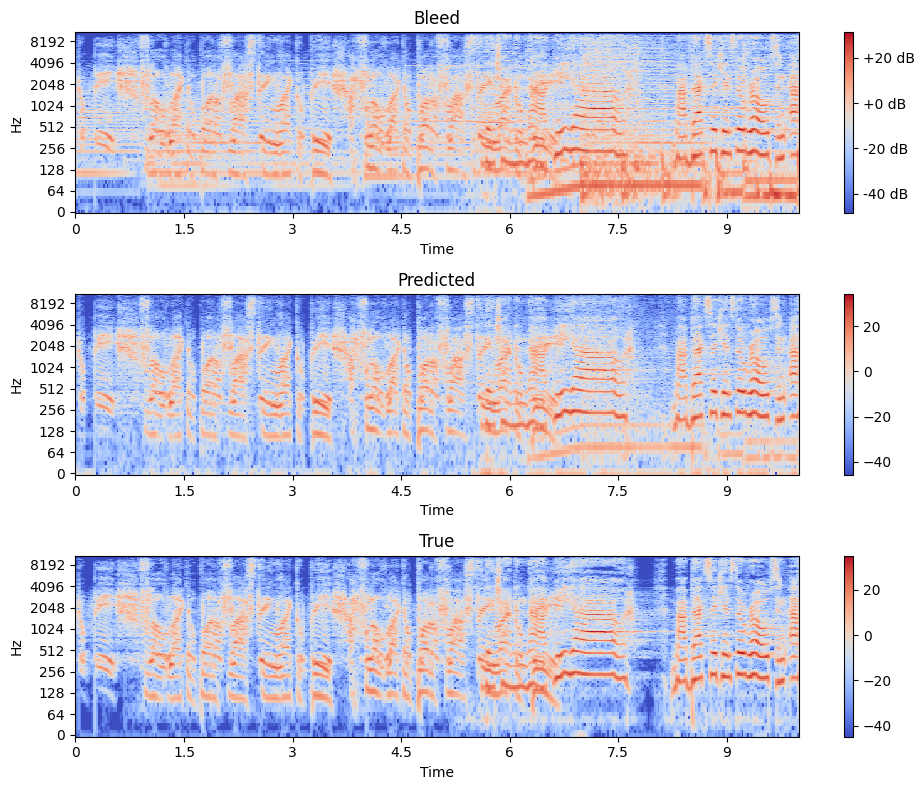

In [12]:
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(bv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Bleed')

plt.subplot(3, 1, 2)
librosa.display.specshow(pv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Predicted')

plt.subplot(3, 1, 3)
librosa.display.specshow(tv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('True')

plt.tight_layout()
plt.show()

In [85]:
# Vocals

change = ((np.abs(pv) - np.abs(bv))/(np.abs(bv)))
print(np.min(change), np.max(change), np.median(change))
threshold = -0.1
mask = change >= threshold
predicted = mask * np.abs(bv)
average = (predicted+np.abs(pv))/2
predicted_db = lb.amplitude_to_db(average)
vreconst = average * np.angle(pv)
vreconst = lb.istft(vreconst)
sf.write(outpath+'reconst_vocal.wav', vreconst, fs)

-0.99950534 564239.7 0.14192536


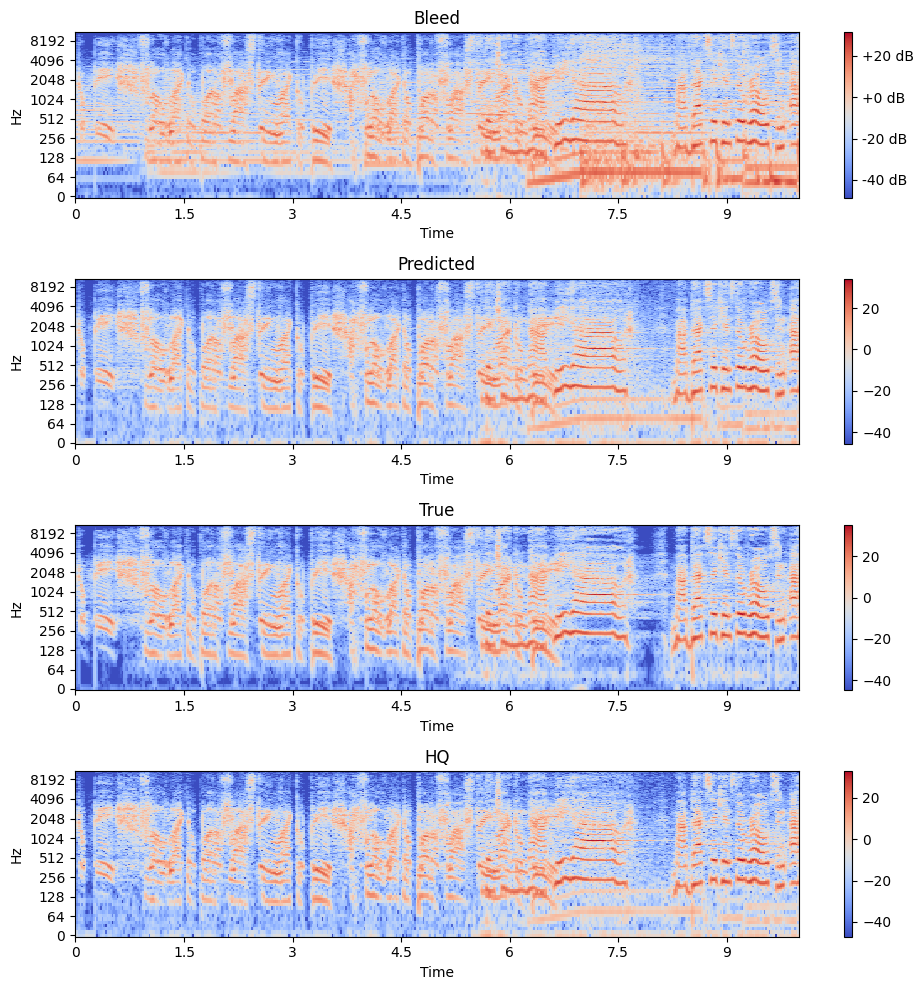

In [86]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
librosa.display.specshow(bv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Bleed')

plt.subplot(4, 1, 2)
librosa.display.specshow(pv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Predicted')

plt.subplot(4, 1, 3)
librosa.display.specshow(tv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('True')

plt.subplot(4, 1, 4)
librosa.display.specshow(predicted_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('HQ')

plt.tight_layout()
plt.show()

In [87]:
compute_sdr(tvocal, bvocal, fs), compute_sdr(tvocal, pvocal, fs), compute_sdr(tvocal[:len(vreconst)], vreconst, fs)

((7.200617606679294, 8.87444412462476, inf, 8.781410542317957),
 (14.297654971637161, 16.241555235441975, inf, 16.82370865747665),
 (-2.983043968657764, -2.005179215927647, inf, 0.1126422856276971))

In [ ]:
-2.3599186989442003, -1.55058032199132, inf, -0.07973147525869645, 0

In [61]:
# Bass

change = ((np.abs(pb) - np.abs(bb))/(np.abs(bb)))
print(np.min(change), np.max(change), np.median(change))

threshold2, threshold2_ = -0.1, 1
maskb1 = change >= threshold2 
maskb2 = change <= threshold2_
mask = maskb1 & maskb2

predicted = mask * np.abs(bb)
average = predicted
predicted_db = lb.amplitude_to_db(average)
breconst = average * np.angle(bb)
breconst = lb.istft(breconst)
sf.write(outpath+'/reconst_bass.wav', breconst, fs)

-0.9996849 36621.29 -0.7284046


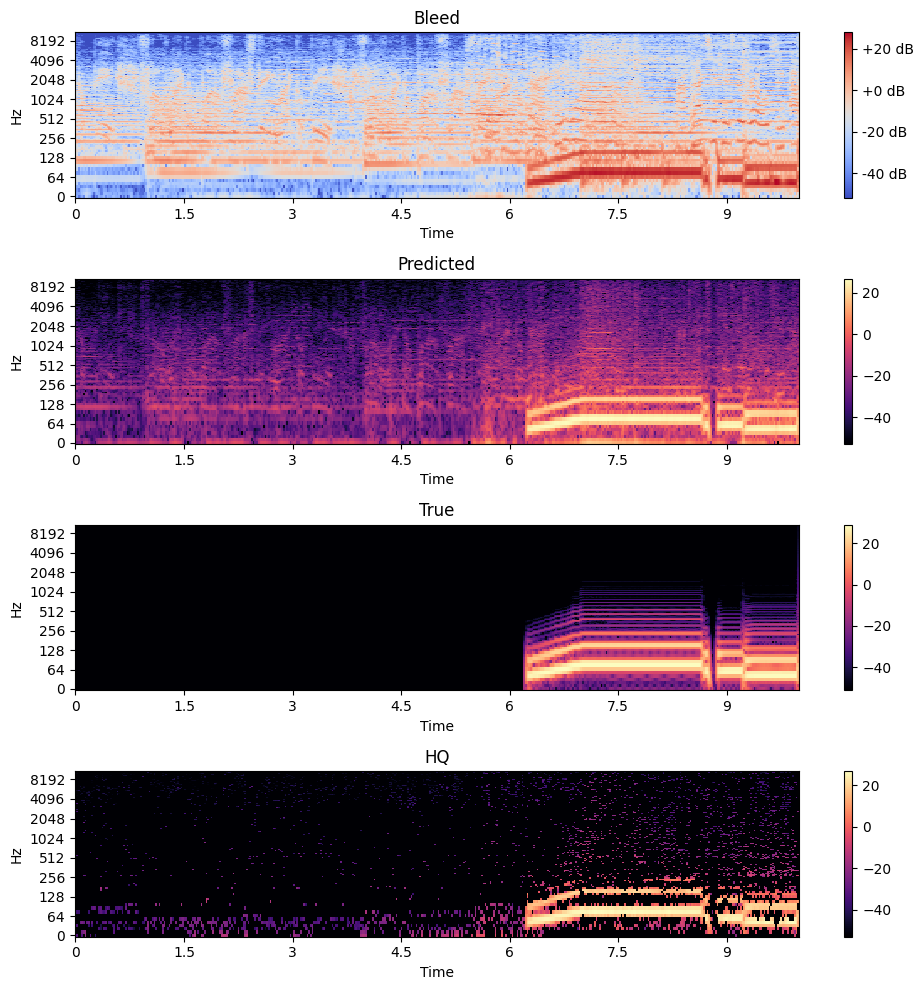

In [21]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
librosa.display.specshow(bb_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Bleed')

plt.subplot(4, 1, 2)
librosa.display.specshow(pb_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Predicted')

plt.subplot(4, 1, 3)
librosa.display.specshow(tb_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('True')

plt.subplot(4, 1, 4)
librosa.display.specshow(predicted_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('HQ')

plt.tight_layout()
plt.show()

In [36]:
# Drums

change = ((np.abs(pd) - np.abs(bd))/(np.abs(bd)))
print(np.min(change), np.max(change), np.median(change))

threshold2, threshold2_ = -0.1, 1
maskd1 = change >= threshold2 
maskd2 = change <= threshold2_
mask = maskd1 & maskd2

predicted = mask * np.abs(bd)
average = predicted
predicted_db = lb.amplitude_to_db(average)
dreconst = average * (mask * np.angle(bd))
dreconst = lb.istft(dreconst)

sf.write(outpath+'/reconst_drums.wav', dreconst, fs)

-0.9995207 70841.086 -0.21531197


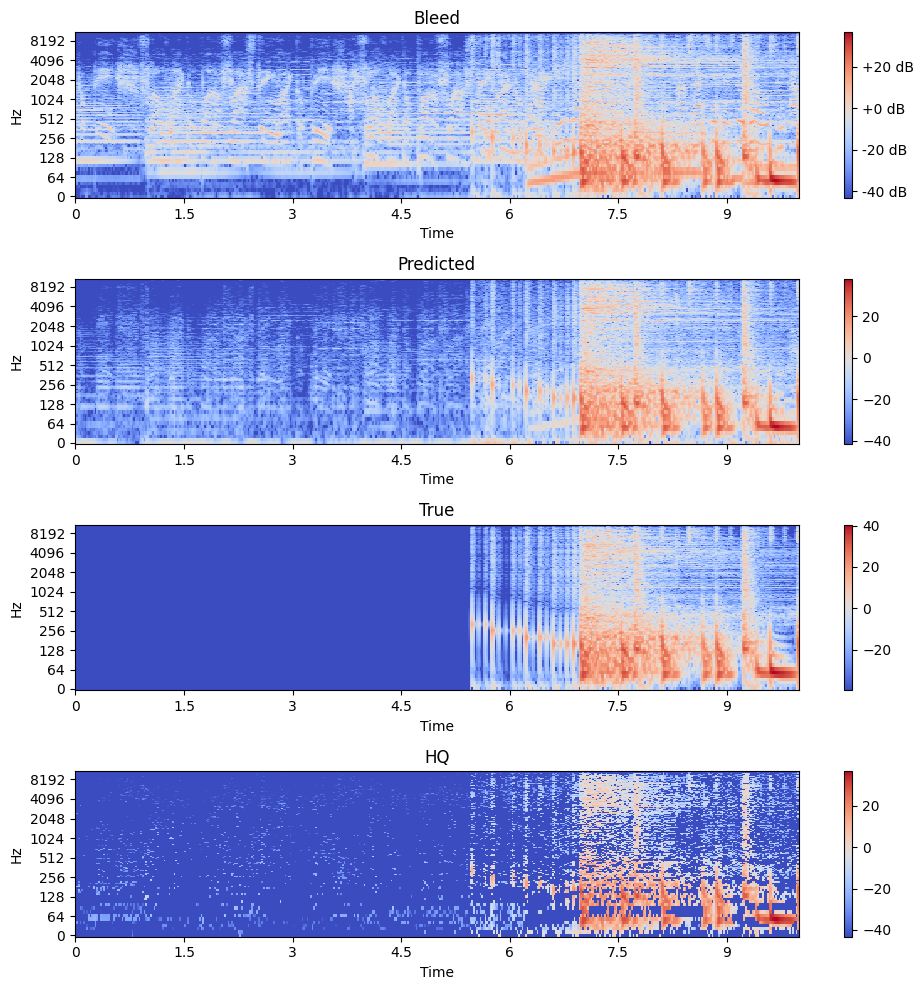

In [23]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
librosa.display.specshow(bd_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Bleed')

plt.subplot(4, 1, 2)
librosa.display.specshow(pd_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Predicted')

plt.subplot(4, 1, 3)
librosa.display.specshow(td_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('True')

plt.subplot(4, 1, 4)
librosa.display.specshow(predicted_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('HQ')

plt.tight_layout()
plt.show()

In [39]:
# Other

change = ((np.abs(po) - np.abs(bo))/(np.abs(bo)))
print(np.min(change), np.max(change), np.median(change))
threshold = -0.1
mask = change >= threshold
predicted = mask * np.abs(bo)
average = predicted
predicted_db = lb.amplitude_to_db(average)
oreconst = average * np.angle(bo)
oreconst = lb.istft(oreconst)
sf.write(outpath+'reconst_other.wav', oreconst, fs)

-0.99720836 2401551.8 0.1664905


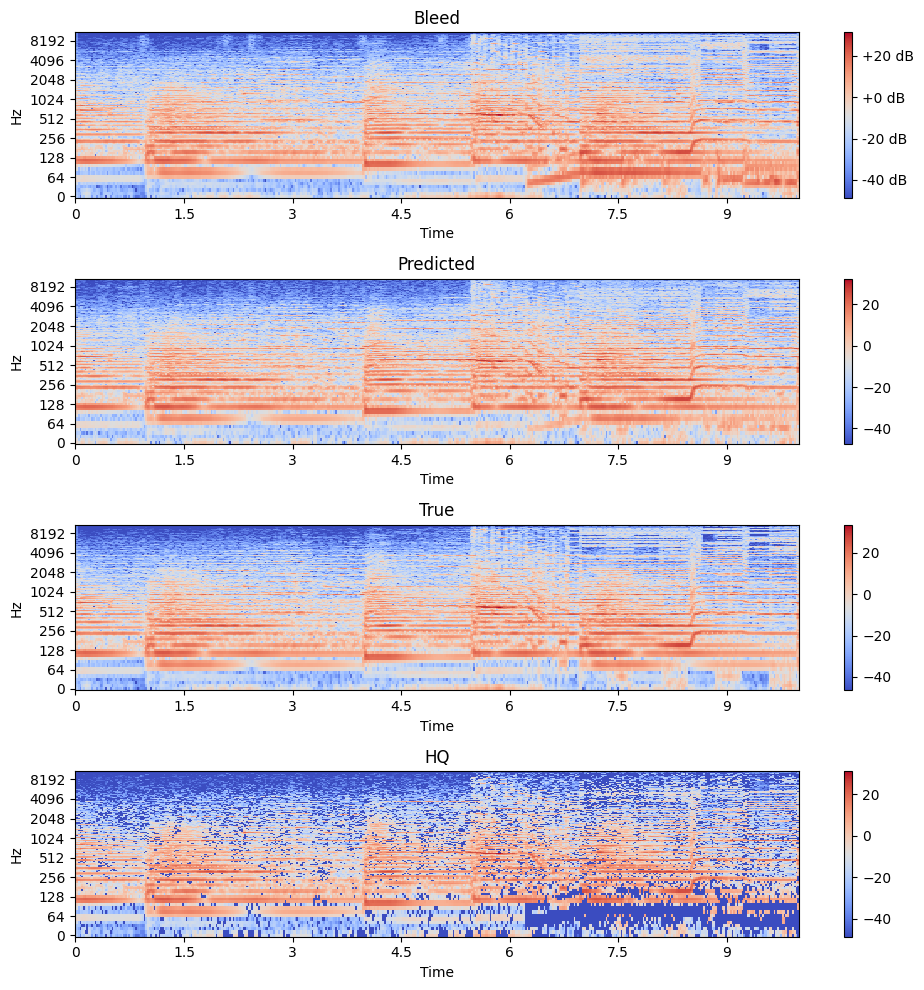

In [40]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
librosa.display.specshow(bo_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Bleed')

plt.subplot(4, 1, 2)
librosa.display.specshow(po_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Predicted')

plt.subplot(4, 1, 3)
librosa.display.specshow(to_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('True')

plt.subplot(4, 1, 4)
librosa.display.specshow(predicted_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('HQ')

plt.tight_layout()
plt.show()

### Calculating SDR

In [28]:
def get_metrics(y):
    avg_y = []
    for i in range(len(y)):
        x = y[~np.isnan(y)]
        avg = sum(x)/(len(x)+0.000001)
        avg_y.append(avg)
    return avg_y

def compute_sdr(true, reconstructed, fs):
    t = np.array([true])
    r = np.array([reconstructed])

    sdr, isr, sir, sar = museval.evaluate(t, r, win=fs, hop=fs)
        
    avg_sdr = get_metrics(sdr)
    avg_isr = get_metrics(isr) #Source to Spatial Distortion Image
    avg_sir = get_metrics(sir)
    avg_sar = get_metrics(sar)

    return sum(avg_sdr)/len(avg_sdr), sum(avg_isr)/len(avg_isr), sum(avg_sir)/len(avg_sir), sum(avg_sar)/len(avg_sar)

In [46]:
vreconst.shape, tvocal.shape

((220160,), (220448,))

In [47]:
compute_sdr(tvocal, bvocal, fs), compute_sdr(tvocal, pvocal, fs), compute_sdr(tvocal[:len(vreconst)], vreconst, fs)

((7.200617606679294, 8.87444412462476, inf, 8.781410542317957),
 (14.297654971637161, 16.241555235441975, inf, 16.82370865747665),
 (-2.410711960982256, -1.5856348375761482, inf, -0.03406436716165894))

In [48]:
compute_sdr(tbass, bbass, fs), compute_sdr(tbass, pbass, fs), compute_sdr(tbass[:len(breconst)], breconst, fs)

((5.234559858128517, 8.188874162797369, inf, 3.514865992119718),
 (11.418317668472852, 12.231638131915238, inf, 15.740666262410686),
 (-1.8388724932270433, -1.7431680952584163, inf, 1.210236703261678))

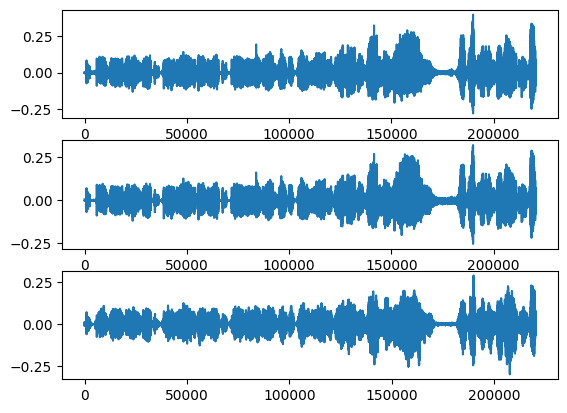

In [51]:
plt.subplot(3, 1, 1)
plt.plot(tvocal)
plt.subplot(3, 1, 2)
plt.plot(pvocal)
plt.subplot(3, 1, 3)
plt.plot(vreconst)
plt.show()

#

In [162]:
bmedian = np.median(np.abs(pv))
bmedian

0.07464553

In [163]:
threshold = bmedian + (4*0.97)  # Adjust the threshold value as desired
mask = pv >= threshold

In [89]:
np.std(np.abs(pv)), np.max(np.abs(pv)), np.min(np.abs(pv))

(0.9715703, 51.372257, 3.053875e-05)

In [90]:
threshold

3.9546455267071723

In [92]:
pred = mask*bv
pred_db = lb.amplitude_to_db(np.abs(pred))

In [152]:
bmedian = np.median(np.abs(pv))
mask2 = bv_db.copy()
threshold = bmedian + (3*0.97)
a = 0.2
mask2[mask2 < threshold] *= a

In [153]:
audio = mask2 * np.angle(bv)

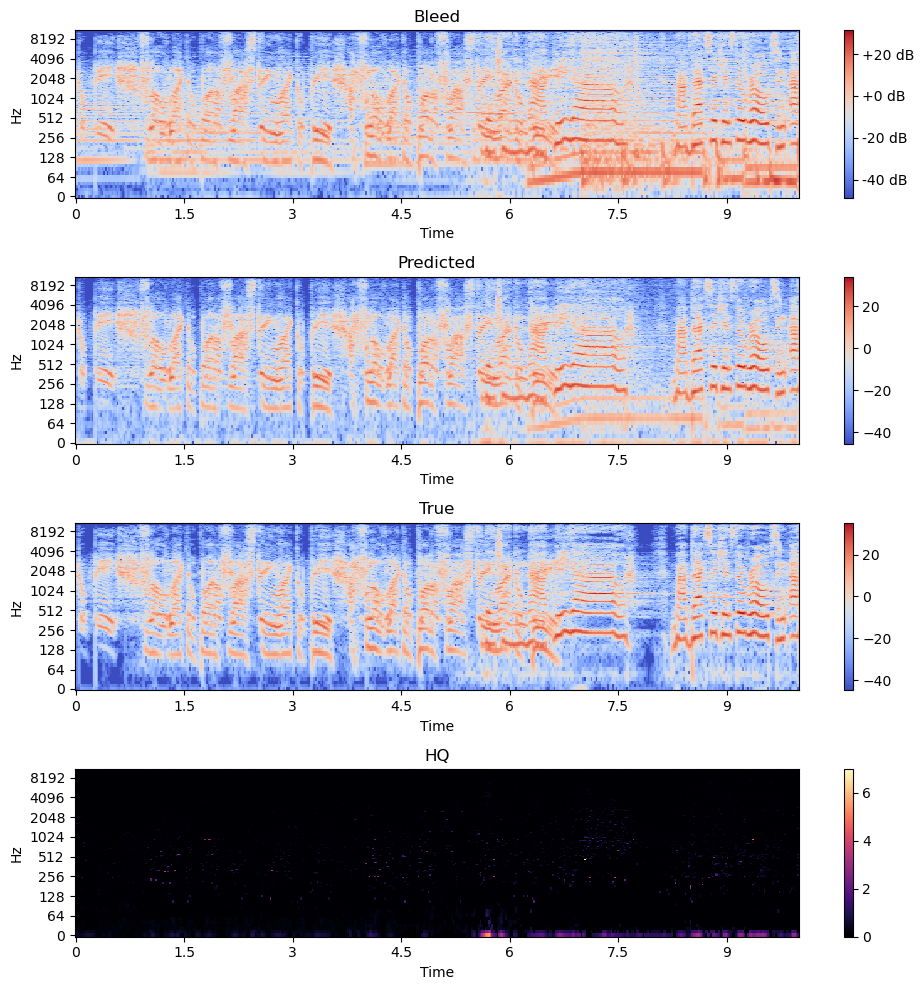

In [228]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
librosa.display.specshow(bv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Bleed')

plt.subplot(4, 1, 2)
librosa.display.specshow(pv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Predicted')

plt.subplot(4, 1, 3)
librosa.display.specshow(tv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('True')

plt.subplot(4, 1, 4)
librosa.display.specshow(predicted, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('HQ')

plt.tight_layout()
plt.show()

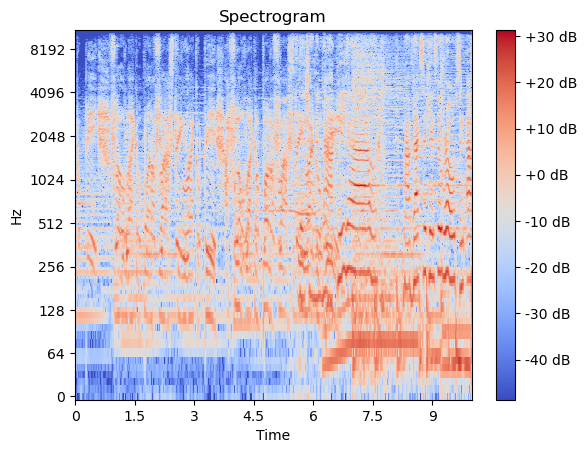

In [161]:
librosa.display.specshow(bv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [162]:
threshold_db = 14.79  # Adjust the threshold value as desired
mask = bv_db >= threshold_db

In [163]:
np.mean(bv_db), np.median(bv_db), np.min(bv_db), np.max(bv_db), np.sqrt(np.var(bv_db))

(-21.98137, -21.025532, -48.695248, 31.304752, 14.79795)

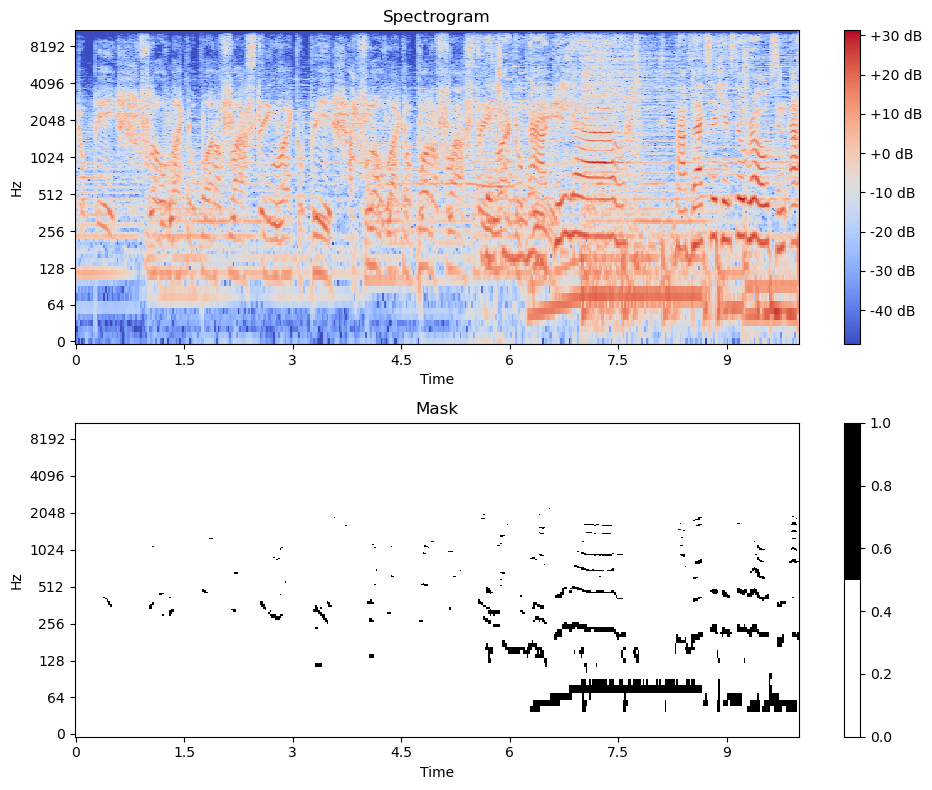

In [164]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(bv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(mask, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Mask')

plt.tight_layout()
plt.show()

-21.226677 -21.098091 -44.86993 35.13007 14.975443


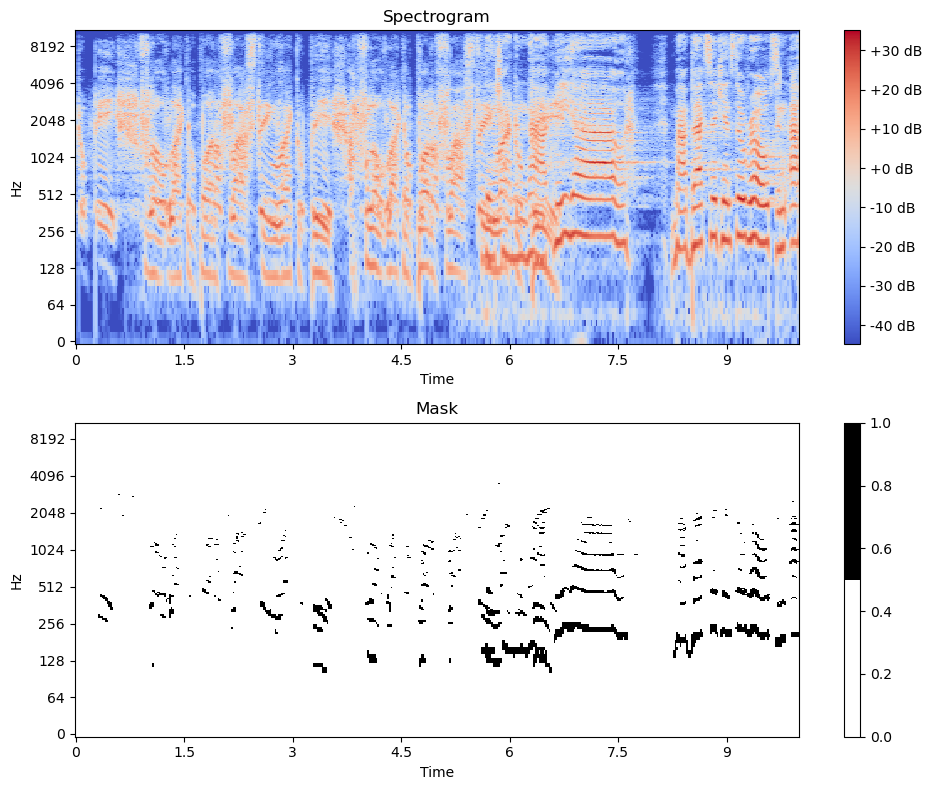

In [66]:
threshold_db = 14.97  # Adjust the threshold value as desired
mask = tv_db >= threshold_db

print(np.mean(tv_db), np.median(tv_db), np.min(tv_db), np.max(tv_db), np.sqrt(np.var(tv_db)))

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(tv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(mask, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Mask')

plt.tight_layout()
plt.show()

-21.629011 -22.539923 -45.785427 34.214573 13.814706


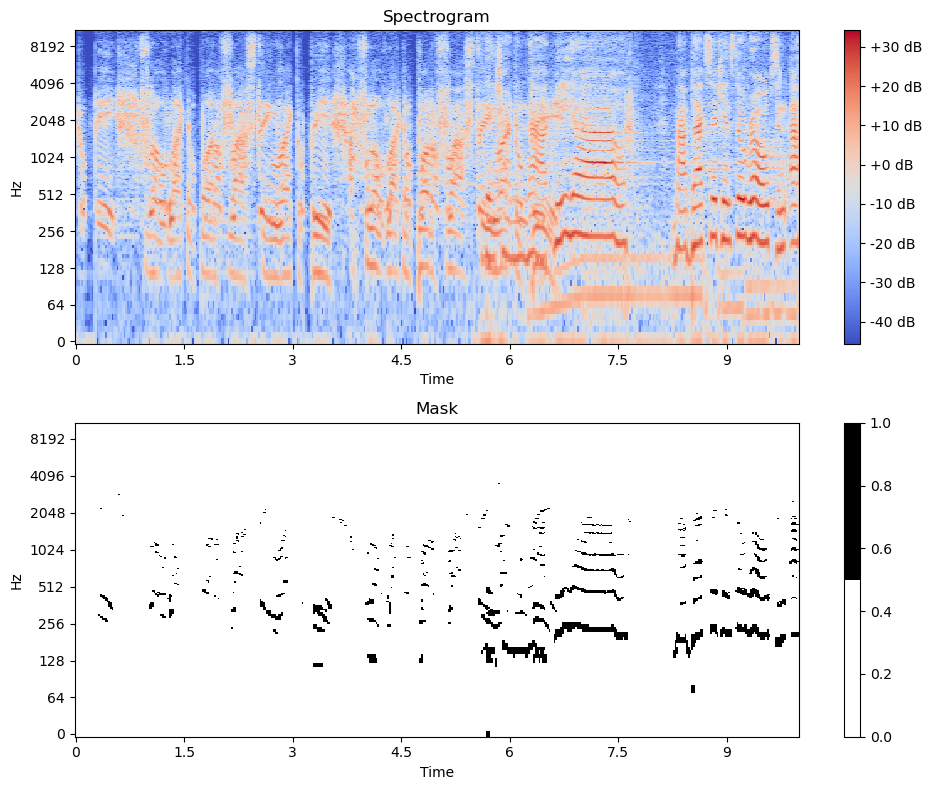

In [69]:
threshold_db = 13.81  # Adjust the threshold value as desired
mask = pv_db >= threshold_db

print(np.mean(pv_db), np.median(pv_db), np.min(pv_db), np.max(pv_db), np.sqrt(np.var(pv_db)))

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(pv_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(mask, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Mask')

plt.tight_layout()
plt.show()

In [71]:
masked_spectrogram = tv_db * mask #(got using predicted)

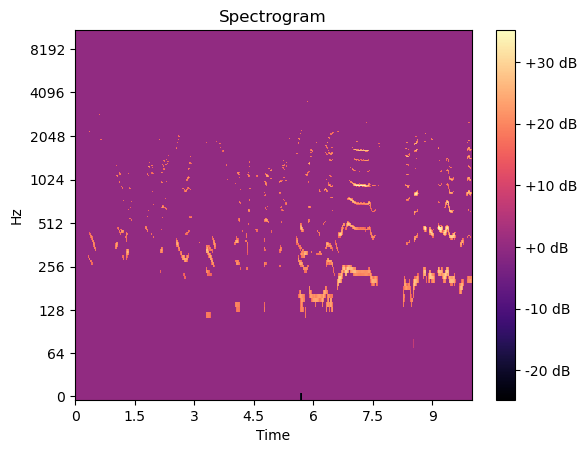

In [72]:
librosa.display.specshow(masked_spectrogram, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [88]:
phase = np.angle(lb.stft(tvocal))

In [91]:
masked_spectrogram.shape, phase.shape

((1025, 431), (1025, 431))

In [92]:
output = masked_spectrogram * np.exp(1j * phase)

In [94]:
out_time = lb.istft(output)

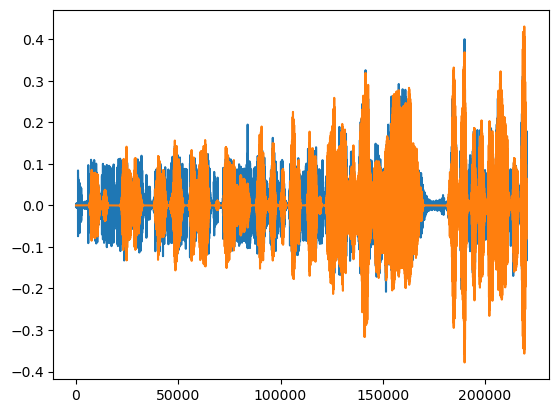

In [96]:
plt.plot(tvocal)
plt.plot(out_time)

In [103]:
sf.write(path+'reconst.wav', out_time, fs)

In [145]:
mask = pv_db.copy()
a = 0
mask[mask < threshold_db] *= a

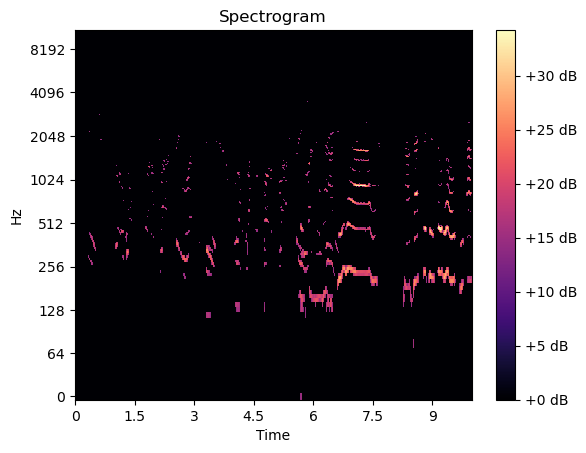

In [146]:
librosa.display.specshow(mask, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [147]:
masked_spectrogram2 = tv_db * mask #(got using predicted)

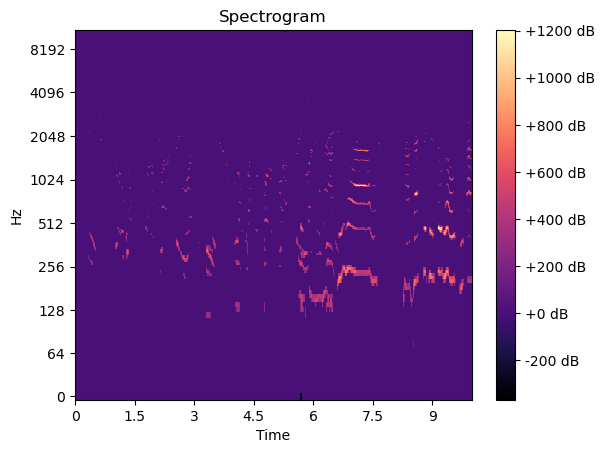

In [148]:
librosa.display.specshow(masked_spectrogram2, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [133]:
output = masked_spectrogram2 * np.exp(1j * phase)
out_time = lb.istft(output)

In [134]:
sf.write(path+'reconst2.wav', out_time, fs)

In [478]:
def split_image_into_patches(image, patch_size):
    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate the number of patches in each dimension
    num_patches_h = height // patch_size[0]
    num_patches_w = width // patch_size[1]

    patches = []
    # Split the image into patches
    for i in range(num_patches_h):
        for j in range(num_patches_w):
            patch = image[i * patch_size[0]: (i + 1) * patch_size[0],
                          j * patch_size[1]: (j + 1) * patch_size[1]]
            patches.append(patch)

    return patches

def reconstruct_image_from_patches(patches, image_shape):
    # Get image dimensions
    height, width = image_shape[:2]

    # Calculate the number of patches in each dimension
    num_patches_h = height // patches[0].shape[0]
    num_patches_w = width // patches[0].shape[1]

    # Create an empty image for reconstruction
    reconstructed_image = np.zeros(image_shape, dtype=np.uint8)

    # Reconstruct the image from patches
    patch_index = 0
    for i in range(num_patches_h):
        for j in range(num_patches_w):
            patch = patches[patch_index]
            reconstructed_image[i * patch.shape[0]: (i + 1) * patch.shape[0],
                                j * patch.shape[1]: (j + 1) * patch.shape[1]] = patch
            patch_index += 1

    return reconstructed_image